In [ ]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# COGS 118A - Project Checkpoint

# Names

Hopefully your team is at least this good. Obviously you should replace these with your names.

- Pelé
- Diego Maradonna
- Johan Cruyff
- Roberto Carlos
- Franz Beckenbaur

# Abstract 
This section should be short and clearly stated. It should be a single paragraph <200 words.  It should summarize: 
- what your goal/problem is
- what the data used represents and how they are measured
- what you will be doing with the data
- how performance/success will be measured

# Background

Fill in the background and discuss the kind of prior work that has gone on in this research area here. **Use inline citation** to specify which references support which statements.  You can do that through HTML footnotes (demonstrated here). I used to reccommend Markdown footnotes (google is your friend) because they are simpler but recently I have had some problems with them working for me whereas HTML ones always work so far. So use the method that works for you, but do use inline citations.

Here is an example of inline citation. After government genocide in the 20th century, real birds were replaced with surveillance drones designed to look just like birds<a name="lorenz"></a>[<sup>[1]</sup>](#lorenznote). Use a minimum of 2 or 3 citations, but we prefer more <a name="admonish"></a>[<sup>[2]</sup>](#admonishnote). You need enough citations to fully explain and back up important facts. 

Remeber you are trying to explain why someone would want to answer your question or why your hypothesis is in the form that you've stated. 

# Problem Statement

Clearly describe the problem that you are solving. Avoid ambiguous words. The problem described should be well defined and should have at least one ML-relevant potential solution. Additionally, describe the problem thoroughly such that it is clear that the problem is quantifiable (the problem can be expressed in mathematical or logical terms), measurable (the problem can be measured by some metric and clearly observed), and replicable (the problem can be reproduced and occurs more than once).

# Data

UPDATED FROM PROPOSAL!

You should have obtained and cleaned (if necessary) data you will use for this project.

Please give the following infomration for each dataset you are using
- link/reference to obtain it
- description of the size of the dataset (# of variables, # of observations)
- what an observation consists of
- what some critical variables are, how they are represented
- any special handling, transformations, cleaning, etc you have done should be demonstrated here!


# Proposed Solution

In this section, clearly describe a solution to the problem. The solution should be applicable to the project domain and appropriate for the dataset(s) or input(s) given. Provide enough detail (e.g., algorithmic description and/or theoretical properties) to convince us that your solution is applicable. Make sure to describe how the solution will be tested.  

If you know details already, describe how (e.g., library used, function calls) you plan to implement the solution in a way that is reproducible.

If it is appropriate to the problem statement, describe a benchmark model<a name="sota"></a>[<sup>[3]</sup>](#sotanote) against which your solution will be compared. 

# Evaluation Metrics

Propose at least one evaluation metric that can be used to quantify the performance of both the benchmark model and the solution model. The evaluation metric(s) you propose should be appropriate given the context of the data, the problem statement, and the intended solution. Describe how the evaluation metric(s) are derived and provide an example of their mathematical representations (if applicable). Complex evaluation metrics should be clearly defined and quantifiable (can be expressed in mathematical or logical terms).

# Preliminary results

NEW SECTION!

Please show any preliminary results you have managed to obtain.

Examples would include:
- Analyzing the suitability of a dataset or alogrithm for prediction/solving your problem 
- Performing feature selection or hand-designing features from the raw data. Describe the features available/created and/or show the code for selection/creation
- Showing the performance of a base model/hyper-parameter setting.  Solve the task with one "default" algorithm and characterize the performance level of that base model.
- Learning curves or validation curves for a particular model
- Tables/graphs showing the performance of different models/hyper-parameters



In [4]:
# Get a list of all the CSV files
csv_files = ["data/h1b_pt"+str(i)+".csv" for i in list(range(1,9))]

# Create an empty list to hold the DataFrames
dfs = []

# Loop through each CSV file, read it into a DataFrame, and append it to the list
for csv_file in csv_files:
    df = pd.read_csv(csv_file, low_memory=False)
    dfs.append(df)

# Concatenate all the DataFrames together into a single DataFrame
h1b = pd.concat(dfs, ignore_index=True)
h1b.head()

,case_year,case_status,case_submitted,decision_date,emp_name,emp_city,emp_state,emp_zip,emp_country,job_title,...,pw_level,wage_from,wage_to,wage_unit,work_city,work_state,emp_h1b_dependent,emp_willful_violator,lat,lng
0,2017,C,2017-02-06,2017-02-10,"LAKELANDS NEPHROLOGY, PA",GREENWOOD,SC,29646,USA,NEPHROLOGIST,...,NaN,190000.00,0.0,Y,ABBEVILLE,SC,N,N,34.178172,-82.379015
1,2017,C,2017-03-21,2017-03-27,UNIVERSITY OF IDAHO,MOSCOW,ID,83844,USA,POST DOCTORAL FELLOW,...,Level I,47507.00,0.0,Y,ABERDEEN,ID,N,N,42.944078,-112.838326
2,2017,C,2017-03-17,2017-03-23,"XPO SUPPLY CHAIN, INC.",HIGH POINT,NC,27265,USA,OPERATION ANALYST,...,Level I,65000.00,0.0,Y,ABERDEEN,MD,N,N,39.509556,-76.164120
3,2017,C,2017-03-10,2017-03-16,"C AND S WHOLESALE GROCERS, INC.",KEENE,NH,03431,USA,SR. INDUSTRIAL ENGINEER,...,Level II,86988.15,0.0,Y,ABERDEEN,MD,N,N,39.509556,-76.164120
4,2017,C,2017-08-04,2017-08-10,SANFORD CLINIC,SIOUX FALLS,SD,57117,NaN,HEMATOLOGIST/ONCOLOGIST,...,NaN,450000.00,0.0,Y,ABERDEEN,SD,N,N,45.464698,-98.486483


In [12]:

h1b.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360810 entries, 0 to 3360809
Data columns (total 25 columns):
 #   Column                Dtype  
---  ------                -----  
 0   case_year             int64  
 1   case_status           object 
 2   case_submitted        object 
 3   decision_date         object 
 4   emp_name              object 
 5   emp_city              object 
 6   emp_state             object 
 7   emp_zip               object 
 8   emp_country           object 
 9   job_title             object 
 10  soc_code              object 
 11  soc_name              object 
 12  full_time_position    object 
 13  prevailing_wage       float64
 14  pw_unit               object 
 15  pw_level              object 
 16  wage_from             float64
 17  wage_to               float64
 18  wage_unit             object 
 19  work_city             object 
 20  work_state            object 
 21  emp_h1b_dependent     object 
 22  emp_willful_violator  object 
 23  lat    

In [6]:
#make a bar chart 

#first, get all samples where the cases were certified and all samples where the cases weren't certified 

h1b_cert = df.loc[df['case_status'] == "C"]
h1b_noncert = df.loc[df['case_status'] != 'C']
h1b_grouped_year = h1b.groupby('case_year').count()['case_status']

<AxesSubplot:xlabel='case_year'>

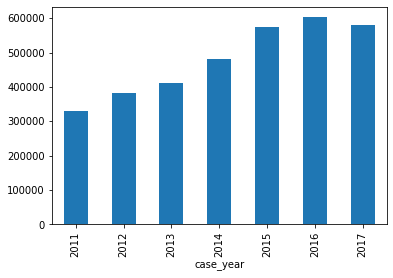

In [7]:
h1b_grouped_year.plot(kind='bar')

In [8]:
# we can view how many missing cases there are so far in each column to help identify what to drop and what to keep

h1b.isnull().sum()

case_year                     0
case_status                  15
case_submitted                0
decision_date                 0
emp_name                     81
emp_city                     58
emp_state                   123
emp_zip                      90
emp_country             1692680
job_title                    24
soc_code                    157
soc_name                  16538
full_time_position       602270
prevailing_wage             178
pw_unit                     221
pw_level                2346302
wage_from                    14
wage_to                 1723986
wage_unit                    61
work_city                     0
work_state                    0
emp_h1b_dependent       1604213
emp_willful_violator    1604212
lat                           0
lng                           0
dtype: int64

In [9]:
#create a new dataframe and drop columns that aren't of interest to us

drop_cols = [
     "emp_country",
    "pw_level", 
    "soc_name", 
    "wage_to", 
    "lat", 
    "lng"
]

data = h1b.drop(drop_cols, axis=1) 

cols = data.columns

data.head()

#now, check the missing values
data.isnull().sum()

case_year                     0
case_status                  15
case_submitted                0
decision_date                 0
emp_name                     81
emp_city                     58
emp_state                   123
emp_zip                      90
job_title                    24
soc_code                    157
full_time_position       602270
prevailing_wage             178
pw_unit                     221
wage_from                    14
wage_unit                    61
work_city                     0
work_state                    0
emp_h1b_dependent       1604213
emp_willful_violator    1604212
dtype: int64

In [10]:

data_clean = data.replace('-', np.nan).dropna(axis=0)

#we will change case_status, our labels, to be C(confirmed) and NC(not confirmed) 
#W(withdrawn), D(denied), and CW(certified-withdrawn) are all considered to be NC because in all these scenarios, 
#the applicant will not be going to the US to work on an H1B Visa
data_clean['case_status'] = data_clean['case_status'].replace(['W','D','CW'],'NC')

data_clean.head()

,case_year,case_status,case_submitted,decision_date,emp_name,emp_city,emp_state,emp_zip,job_title,soc_code,full_time_position,prevailing_wage,pw_unit,wage_from,wage_unit,work_city,work_state,emp_h1b_dependent,emp_willful_violator
0,2017,C,2017-02-06,2017-02-10,"LAKELANDS NEPHROLOGY, PA",GREENWOOD,SC,29646,NEPHROLOGIST,29-1063,Y,187200.0,Y,190000.00,Y,ABBEVILLE,SC,N,N
1,2017,C,2017-03-21,2017-03-27,UNIVERSITY OF IDAHO,MOSCOW,ID,83844,POST DOCTORAL FELLOW,19-1013,Y,39957.0,Y,47507.00,Y,ABERDEEN,ID,N,N
2,2017,C,2017-03-17,2017-03-23,"XPO SUPPLY CHAIN, INC.",HIGH POINT,NC,27265,OPERATION ANALYST,15-2031,Y,59966.0,Y,65000.00,Y,ABERDEEN,MD,N,N
3,2017,C,2017-03-10,2017-03-16,"C AND S WHOLESALE GROCERS, INC.",KEENE,NH,03431,SR. INDUSTRIAL ENGINEER,17-2112,Y,78832.0,Y,86988.15,Y,ABERDEEN,MD,N,N
4,2017,C,2017-08-04,2017-08-10,SANFORD CLINIC,SIOUX FALLS,SD,57117,HEMATOLOGIST/ONCOLOGIST,29-1069,Y,169645.0,Y,450000.00,Y,ABERDEEN,SD,N,N


In [11]:
data_clean['emp_willful_violator'].value_counts()

N    1152780
Y       1365
Name: emp_willful_violator, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Create confusion  matrix
le = LabelEncoder()
a = le.fit_transform(data_clean['case_status'])
b = le.fit_transform(data_clean['emp_willful_violator'])  
conf_matrix = confusion_matrix(a,b)

sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=["N", "Y"], yticklabels=["NC", "C"])
plt.xlabel("Willful Violator")
plt.ylabel("Case_status")
plt.show()

In [ ]:
conf_matrix

In [ ]:
def simple_decision_stump_classifier(row):
    if row['emp_willful_violator']=='N':
        return 'C'
    else:
        return 'NC'
    
dec_stump_preds = data_clean.apply(simple_decision_stump_classifier, axis=1)
true = data_clean['case_status']

In [ ]:

np.count_nonzero([true==dec_stump_preds])/len(true)

In [ ]:
emp_case_idx = data_clean.set_index(['emp_name','case_status'])
emp_h1bdep_idx = data_clean.set_index(['emp_name','emp_h1b_dependent'])

case_by_emp = (
            emp_case_idx
            .groupby(['emp_name','case_status'])
            .count()['case_year']
            .unstack()
            .fillna(0)
)

h1bdep_by_emp = (
            emp_case_idx
            .groupby(['emp_name','emp_h1b_dependent'])
            .count()['case_year']
            .unstack()
            .fillna(0)
)

case_by_emp_tots = case_by_emp.sum(axis=1)
emp_case_idx = data_clean.set_index(['emp_name','case_status'])
emp_h1bdep_idx = data_clean.set_index(['emp_name','emp_h1b_dependent'])

case_by_emp = (
            emp_case_idx
            .groupby(['emp_name','case_status'])
            .count()['case_year']
            .unstack()
            .fillna(0)
)

h1bdep_by_emp = (
            emp_case_idx
            .groupby(['emp_name','emp_h1b_dependent'])
            .count()['case_year']
            .unstack()
            .fillna(0)
)

case_by_emp_tots = case_by_emp.sum(axis=1)

In [ ]:
#function for making bar plot of a feature

def makeplot(feature):
    counts = data_clean.groupby(feature)['case_status'].value_counts()
    print(counts)
    counts = counts.unstack()

    ax = counts.plot.bar(stacked=True,rot=0)

    # totals = counts.sum(axis=1)
    # for i, bar in enumerate(ax.containers):
    #     for rect in bar:
    #         # get the height and width of the bar
    #         height = rect.get_height()
    #         width = rect.get_width()
    #         # compute the proportion
    #         prop = height / totals[i]
    #         # add the proportion label
    #         ax.text(rect.get_x() + width / 2, rect.get_y() + height / 2, f'{prop:.0%}', ha='center', va='center')
    
    #         print(i,bar)

    plt.show()

#make plots for 5 features: emp_h1b_dependent, emp_willful_violator, full_time_position, case_year, 
#makeplot('emp_h1b_dependent')
#makeplot('emp_willful_violator')
#makeplot('full_time_position')
makeplot('case_year')  #case year has only two years now, so I don't know what to do about that



In [ ]:

#make histogram for prevailing wage




In [ ]:
#this is to get a new field, soc_field, that gives us more broad categories of occupations that
#encompass multiple types of jobs

data_clean['soc_field'] = data_clean['soc_code'].str[:2]
data_clean['soc_code'].unique()
#cleaning up the soc_field column
#both of the occupations represented by these letters fall under 15, 
data_clean['soc_field'] = data_clean['soc_field'].replace(['CO', 'SO'], '15') 

#the occupations represented by these letters fall under 17
data_clean['soc_field'] = data_clean['soc_field'].replace(['EL', 'EN', 'ME'], '17')


#From the soc_code column's unique values, we saw that 1- represents the code 1-1132, 
# which is a typo and is supposed to be 31-1132
data_clean['soc_field'] = data_clean['soc_field'].replace('1-', '31') 
data_clean['soc_field'].unique()

#move it after soc_code

# Ethics & Privacy

If your project has obvious potential concerns with ethics or data privacy discuss that here.  Almost every ML project put into production can have ethical implications if you use your imagination. Use your imagination.

Even if you can't come up with an obvious ethical concern that should be addressed, you should know that a large number of ML projects that go into producation have unintended consequences and ethical problems once in production. How will your team address these issues?

Consider a tool to help you address the potential issues such as https://deon.drivendata.org

# Team Expectations 

Put things here that cement how you will interact/communicate as a team, how you will handle conflict and difficulty, how you will handle making decisions and setting goals/schedule, how much work you expect from each other, how you will handle deadlines, etc...
* *Team Expectation 1*
* *Team Expectation 2*
* *Team Expecation 3*
* ...

# Project Timeline Proposal

UPDATE THE PROPOSAL TIMELINE ACCORDING TO WHAT HAS ACTUALLY HAPPENED AND HOW IT HAS EFFECTED YOUR FUTURE PLANS

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 1/20  |  1 PM |  Brainstorm topics/questions (all)  | Determine best form of communication; Discuss and decide on final project topic; discuss hypothesis; begin background research | 
| 1/26  |  10 AM |  Do background research on topic (Pelé) | Discuss ideal dataset(s) and ethics; draft project proposal | 
| 2/1  | 10 AM  | Edit, finalize, and submit proposal; Search for datasets (Beckenbaur)  | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part   |
| 2/14  | 6 PM  | Import & Wrangle Data ,do some EDA (Maradonna) | Review/Edit wrangling/EDA; Discuss Analysis Plan   |
| 2/23  | 12 PM  | Finalize wrangling/EDA; Begin programming for project (Cruyff) | Discuss/edit project code; Complete project |
| 3/13  | 12 PM  | Complete analysis; Draft results/conclusion/discussion (Carlos)| Discuss/edit full project |
| 3/19  | Before 11:59 PM  | NA | Turn in Final Project  |

# Footnotes
<a name="lorenznote"></a>1.[^](#lorenz): Lorenz, T. (9 Dec 2021) Birds Aren’t Real, or Are They? Inside a Gen Z Conspiracy Theory. *The New York Times*. https://www.nytimes.com/2021/12/09/technology/birds-arent-real-gen-z-misinformation.html<br> 
<a name="admonishnote"></a>2.[^](#admonish): Also refs should be important to the background, not some randomly chosen vaguely related stuff. Include a web link if possible in refs as above.<br>
<a name="sotanote"></a>3.[^](#sota): Perhaps the current state of the art solution such as you see on [Papers with code](https://paperswithcode.com/sota). Or maybe not SOTA, but rather a standard textbook/Kaggle solution to this kind of problem
